In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

def derivada(f,x,h=1e-4):
    return (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h))/(12.*h)
def m_newton(funcion,x_0,error=1e-8):
    xn=x_0
    yn=funcion(xn)
    n=0
    while abs(yn)>=error:
        #print n,'\t',xn
        xn = xn - (funcion(xn))/(derivada(funcion,xn))
        yn=funcion(xn)
        n += 1
    return xn

def buscar_raiz(func,x_0,x,dx=0.1,error=1e-8):
    raices=[m_newton(func,x_0)]
    n=int((x[1]-x[0])/dx)
    for i in range(n+1):
        x_0 += dx
        raiz=m_newton(func,x_0)
        if (x[0]-error<=raiz<=x[1]+error):
            if (abs(raices[-1])-error)<=raiz<=(abs(raices[-1])+error):
                continue
            else:
                raices.append(raiz)
    return raices

In [3]:
def f(x):
    return cos(x) + (6/5)*sin(x**2)

In [4]:
r1=buscar_raiz(f,1.4,[0,2*pi])
print  r"Estas son las raices de f(x) en el intervalo [0,2pi]", r1

Estas son las raices de f(x) en el intervalo [0,2pi] [1.7276420224947926, 2.8534421550945948, 2.7276420224532241, 2.8534421553029286, 2.7276420224947922, 3.8534421551157956, 3.6867361505986005, 3.8534421550945459, 3.6867361504497582, 4.3797484465824104, 4.6867361506006855, 4.9859028618001009, 5.3797484465824104, 5.531443899796634, 5.3797484465793275, 6.0315772088449995, 5.9859028608106035, 6.0315772083193497]


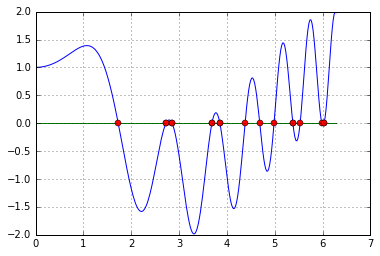

In [5]:
x=linspace(0,2*pi,300)
t=zeros(len(r1))
plot(x,cos(x)+(6/5)*sin(x**2))
plot([0,2*pi],[0,0])
plot(r1,t,'o',lw=2)
grid(True)
show()


In [6]:
def derivada_2D(f,xi,y,h=1e-4):
    return (-f(xi,y+2*h)+8*f(xi,y+h)-8*f(xi,y-h)+f(xi,y-2*h))/(12.*h)

def m_newton_2D(funcion,xi,y_0,error=1e-8):
    yn=y_0
    zn=funcion(xi,yn)
    n=0
    while abs(zn)>=error:
        #print n,'\t',xn
        yn = yn - (funcion(xi,yn))/(derivada_2D(funcion,xi,yn))
        zn=funcion(xi,yn)
        n += 1
        if n==10:
            break
    return yn


def raices_xi(f,x_y,dy=0.1,error=1e-8):
    n=int((x_y[1]-x_y[0])/dy)
    x=linspace(x_y[0],x_y[1],100)
    y0=x_y[0]+0.15
    r_x=[x[1]]
    r_y=[m_newton_2D(f,x[0],y0)]
    for i in xrange(len(x)):
        k=0
        for j in xrange(0,n):
            y0=x_y[0]+0.15+j*dy
            raiz=m_newton_2D(f,x[i],y0)
            if (abs(raiz)<=(x_y[1]+error) and abs(f(x[i],raiz))<=error):
                if ((r_y[-1]-error)<=raiz<=(r_y[-1]+error)):
                    continue
                else:
                    r_y.append(raiz)
                    r_x.append(x[i])          
    return r_x,r_y

C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


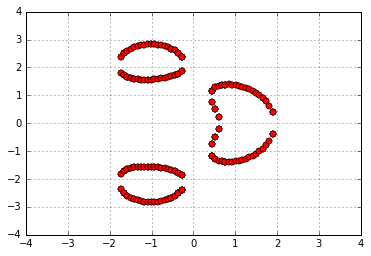

In [7]:
def f(x,y):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2) + exp(-(y-2)**2)) + 6*x*(x**2 + y**2)*exp(-(x**2 + y**2)) - 1 

solx,soly=raices_xi(f,[-4,4],0.1)

plot(solx,soly,'ro')
xlim([-4,4])
ylim([-4,4])
grid(True)


4.5278720548 3.63401089228


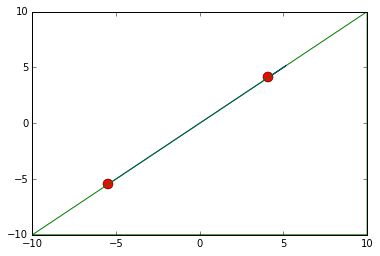

In [9]:
def e_mov(var,t,fric=0,alfa=pi/4,g=9.8,m=1):
    ds = var[1]
    if fric == 0:
        dvs = -g*sin(alfa)
        #print "No use un modelo de friccion"
    else:
        dvs = -g*sin(alfa) - fric(ds)
        #print "Use un modelo de friccion"
    return array([ds,dvs])

def fric_v(v,gamma=0.5):
    return gamma*v

def fric_v2(v,gamma=0.5):
    if v>0:
        coef=gamma*v*v
    if v<0:
        coef= -gamma*v*v
    return coef
v0x,v0y=10*rand(),10*rand()
v0=sqrt(v0x**2 + v0y**2)
x0,y0=10*rand(),10*rand()
r0=sqrt(x0**2 + y0**2)
t,sol=rk4(e_mov,[r0,v0],[0,5],fric_v2)
x=sol[:,0]*cos(7*pi/4)
y=-sol[:,0]*sin(7*pi/4)
#plot(x,y)
plot(x,y)
plot([x[0],x[-1]],[y[0],y[-1]],'ro',markersize=10)
plot([10,-10,10,10],[10,-10,-10,10])
print x0,y0